Data Import and Load

In [0]:
!pip install -q keras
import tensorflow as tf
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.optimizers import Adagrad
import matplotlib
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical

In [2]:
train, test = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================]11493376/11490434 [==============================] - 0s 0us/step



In [0]:
mnist_x, mnist_y = train

In [0]:
mnist_tx, mnist_ty = test

Data Preprocessing

In [5]:
mnist_newx = mnist_x.reshape(mnist_x.shape[0], mnist_x.shape[1]*mnist_x.shape[2])
mnist_newtx = mnist_tx.reshape(mnist_tx.shape[0], mnist_tx.shape[1]*mnist_tx.shape[2])
print('Shape of training data:', mnist_newx.shape)
print('Shape of test data:', mnist_newtx.shape)

Shape of training data: (60000, 784)
Shape of test data: (10000, 784)


In [0]:
data = mnist_newx
testdata = mnist_newtx

In [0]:
data = data.astype('float32')
testdata = testdata.astype('float32')

In [0]:
data /= 255
testdata /= 255

In [0]:
labels = mnist_y
testlabels = mnist_ty

In [0]:
categorical_labels = to_categorical(labels, num_classes=None)
categorical_tlabels = to_categorical(testlabels, num_classes=None)
    

Creating Model

In [0]:
model = Sequential()
model.add(Dense(500, input_dim=784, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

SGD

In [0]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [0]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)


In [39]:
scoretrain = model.fit(data, categorical_labels, batch_size=128, epochs=10, verbose=2, validation_data=(testdata, categorical_tlabels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 0.4319 - acc: 0.8818 - val_loss: 0.2366 - val_acc: 0.9308
Epoch 2/10
 - 6s - loss: 0.1961 - acc: 0.9436 - val_loss: 0.1638 - val_acc: 0.9526
Epoch 3/10
 - 6s - loss: 0.1439 - acc: 0.9593 - val_loss: 0.1261 - val_acc: 0.9620
Epoch 4/10
 - 6s - loss: 0.1129 - acc: 0.9674 - val_loss: 0.1093 - val_acc: 0.9662
Epoch 5/10
 - 6s - loss: 0.0913 - acc: 0.9738 - val_loss: 0.0932 - val_acc: 0.9723
Epoch 6/10
 - 6s - loss: 0.0765 - acc: 0.9779 - val_loss: 0.0882 - val_acc: 0.9733
Epoch 7/10
 - 6s - loss: 0.0647 - acc: 0.9819 - val_loss: 0.0856 - val_acc: 0.9724
Epoch 8/10
 - 6s - loss: 0.0557 - acc: 0.9844 - val_loss: 0.0752 - val_acc: 0.9766
Epoch 9/10
 - 6s - loss: 0.0480 - acc: 0.9864 - val_loss: 0.0692 - val_acc: 0.9795
Epoch 10/10
 - 6s - loss: 0.0414 - acc: 0.9885 - val_loss: 0.0718 - val_acc: 0.9782


In [40]:
scoretest = model.evaluate(testdata, categorical_tlabels, verbose=2)
print("Test Loss", scoretest[0])
print("Test Accuracy", scoretest[1])

Test Loss 0.07179640369974077
Test Accuracy 0.9782


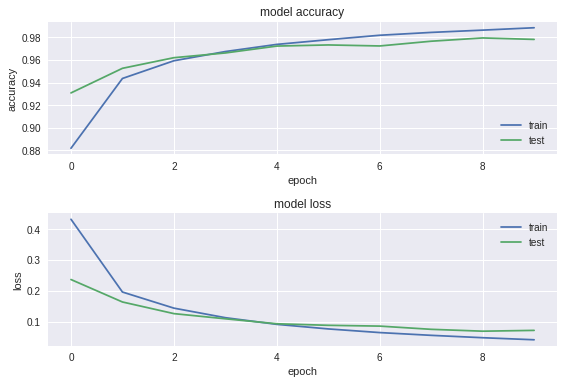

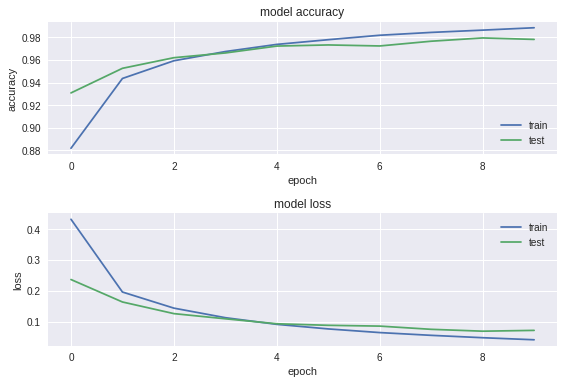

In [41]:
# plots of metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(scoretrain.history['acc'])
plt.plot(scoretrain.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(scoretrain.history['loss'])
plt.plot(scoretrain.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

Adagrad

In [0]:
adagrad = Adagrad(lr=0.01, epsilon=None, decay=0.0)

In [0]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adagrad)

In [47]:
scoretrainada = model.fit(data, categorical_labels, batch_size=128, epochs=10, verbose=2, validation_data=(testdata, categorical_tlabels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 6s - loss: 0.3493 - acc: 0.9537 - val_loss: 0.0743 - val_acc: 0.9773
Epoch 2/10
 - 6s - loss: 0.0385 - acc: 0.9886 - val_loss: 0.0666 - val_acc: 0.9798
Epoch 3/10
 - 6s - loss: 0.0246 - acc: 0.9932 - val_loss: 0.0588 - val_acc: 0.9824
Epoch 4/10
 - 6s - loss: 0.0155 - acc: 0.9963 - val_loss: 0.0617 - val_acc: 0.9815
Epoch 5/10
 - 6s - loss: 0.0108 - acc: 0.9981 - val_loss: 0.0571 - val_acc: 0.9835
Epoch 6/10
 - 6s - loss: 0.0079 - acc: 0.9990 - val_loss: 0.0606 - val_acc: 0.9826
Epoch 7/10
 - 6s - loss: 0.0060 - acc: 0.9993 - val_loss: 0.0613 - val_acc: 0.9828
Epoch 8/10
 - 6s - loss: 0.0046 - acc: 0.9996 - val_loss: 0.0611 - val_acc: 0.9826
Epoch 9/10
 - 6s - loss: 0.0037 - acc: 0.9997 - val_loss: 0.0596 - val_acc: 0.9831
Epoch 10/10
 - 6s - loss: 0.0030 - acc: 0.9999 - val_loss: 0.0608 - val_acc: 0.9833


In [49]:
scoretest = model.evaluate(testdata, categorical_tlabels, verbose=2)
print("Test Loss", scoretest[0])
print("Test Accuracy", scoretest[1])

Test Loss 0.06079752272721016
Test Accuracy 0.9833


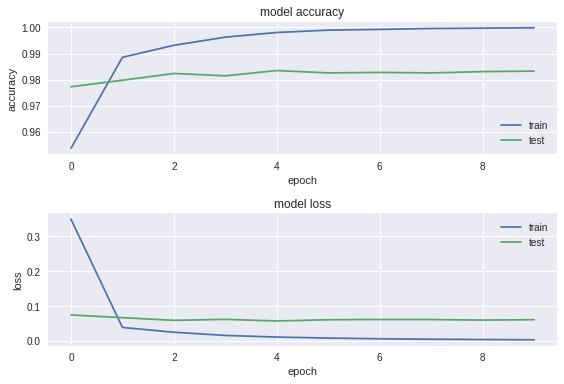

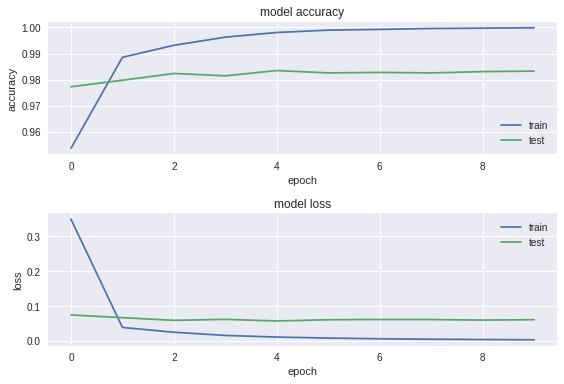

In [50]:
# plots of metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(scoretrainada.history['acc'])
plt.plot(scoretrainada.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(scoretrainada.history['loss'])
plt.plot(scoretrainada.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig


acc: 11.20%
